高维数据降维是指采用某种映射方法，降低随机变量的数量，例如将数据点从高维空间映射到低维空间中，从而实现维度减少。

降维分为：特征选择 和 特征提取

特征选择：是从含有冗余信息以及噪声信息的数据中找出主要变量；

特征提取：是去掉原来的数据，生成新的变量，可以寻找数据内部的本质结构特征。

降维的过程是通过对输入的原始数据特征进行学习，得到一个映射函数，实现将输入样本映射后到低维空间中之后，原始数据特征并没有明显的损失，通常情况下新空间的维度要小于原空间的维度。目前大部分降维算法是处理向量形式的数据。

# 1、主成分分析

主成分分析 PCA 是最常用的线性降维方法，它的目标是通过某种线性投影，将高维的数据映射到低维的空间中，并期望在所投影的维度上数据的方差最大，以此使用较少的维度，同时保留较多原数据的维度。

主成分分析的降维是指经过正交变换后，形成新的特征集合，然后从中选择比较重要的一部分子特征集合，从而实现降维。这种方式并非是在原始特征中选择，所以 PCA 这种线性降维方式最大程度上保留了原有的样本特征。

设有 m 条 n 维的数据， PCA 一般步骤为：

(1) 将原始数据按列组成 n 行 m 列矩阵 X；

(2) 计算矩阵 X 中每个特征属性 (n 维) 的平均向量 M (平均值)；

(3) 将 X 的每一行(代表一个属性字段)进行零均值化，即减去 M ；

(4) 按照公式 C = 1/m * XX.T 求出协方差矩阵；

(5) 求出协方差矩阵的特征值及对应的特征向量；

(6) 将特征向量按照对应特征值从大到小按行排列成矩阵，取前 k(k<n) 行组成基向量 P；

(7) 通过 Y = PX 计算降维到 k 维后的样本特征


In [1]:
# 例：基于sklearn和numpy随机生成2个类别共40个三维空间的样本点
import numpy as np

In [3]:
# multivariate_normal 生成多元正态分布需要参数：期望和方差
mu_vec1 = np.array([0,0,0])  # 样本均值
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])  # 协方差矩阵
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T     # 第一个类别

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T     # 第二个类别

In [4]:
class1_sample

array([[-1.29137078,  0.49585257,  1.06024664, -0.83530336, -1.9180462 ,
        -0.98897424,  0.28472022,  2.13062396, -0.27303306,  0.83327819,
        -0.9664226 ,  0.97888614,  0.17388219,  0.06650957,  1.14817414,
        -0.35297253,  0.03290903,  0.15402362, -0.52792529,  0.27456548],
       [-1.05882418, -1.33686134,  0.45948568,  1.49657327,  0.68781516,
         1.75742582,  0.09933031, -1.12782041,  1.75623303,  0.54522147,
        -1.14825121,  1.5120669 , -2.46350095,  1.09002813,  0.76598021,
         0.31985861,  0.60293363,  1.04947898,  0.95991295,  1.05102913],
       [ 0.60496414,  1.28046511,  0.14770512,  0.47721642, -0.43425865,
         1.11675886, -0.76882683,  0.13631037, -1.15863651, -0.17407302,
        -1.14494984,  0.02685271, -1.17597218,  0.37017655,  0.00678498,
         0.74223761,  2.46606039, -1.7110132 , -1.25256179,  0.8273836 ]])

In [5]:
class2_sample

array([[ 3.65744238,  1.88031362,  0.22304931,  1.08330996,  0.37175978,
         1.47571618,  0.30435711,  0.46239045, -0.96433144,  1.45663774,
         1.05170571, -0.6885013 ,  1.88816988,  0.33098471,  0.40464219,
         0.66338364, -0.08928695,  0.61368698,  0.73199261,  0.93386407],
       [-0.54764497,  1.0202965 ,  1.53284751,  2.9386322 ,  1.0594144 ,
         0.92616148,  2.07388568,  2.78581166,  1.54626305,  0.22864346,
         3.89639649, -1.76393963,  1.78647394,  0.55792632,  1.2333196 ,
         0.84299703,  2.01444009,  1.1245431 ,  0.52942383,  0.57638128],
       [ 1.31044533,  1.6644335 ,  0.45661257,  1.21535593,  2.68277464,
         1.79035386,  3.51961053,  1.8936684 ,  1.14105369,  2.16423797,
         0.23059916,  1.76380776,  2.19167705,  0.49111251, -0.79846534,
         0.22587473,  0.40659722,  0.52393518,  0.99173472,  0.22253178]])

In [6]:
import matplotlib.pyplot as plt

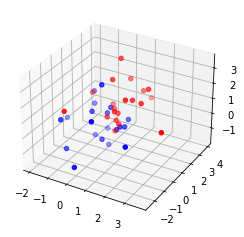

In [13]:
ax = plt.subplot(projection = '3d')
ax.scatter(class1_sample[0],class1_sample[1],class1_sample[2],c = 'b')
ax.scatter(class2_sample[0],class2_sample[1],class2_sample[2],c = 'r')

现在用 PAC 降维到二维空间

In [16]:
# 计算平均向量
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

print(mean_x,mean_y,mean_z)
mean_vector = np.array([mean_x,mean_y,mean_z])
print(mean_vector)

0.4067727572897743 0.78450970502982 0.6117643759880084
[0.40677276 0.78450971 0.61176438]


In [17]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)

In [18]:
# 散布矩阵 S 和协方差矩阵是不一样的，但是都是 PCA 里可用于求解特征向量和特征值
print(scatter_matrix)

array([[134.50723632,   4.61575505,  39.77365835],
       [  4.61575505, 195.24728888,  34.96710809],
       [ 39.77365835,  34.96710809, 165.6358032 ]])

In [21]:
# 计算特征值 和 特征向量
eig_val_sc,eig_vec_sc = np.linalg.eig(scatter_matrix)
print(eig_val_sc)
print(eig_vec_sc)

[104.19555185 164.55366428 226.64111226]
[[ 0.76909153 -0.56339054 -0.30181006]
 [ 0.1947871   0.65636239 -0.72886652]
 [-0.60873328 -0.50177636 -0.61454397]]


按照特征值和特征向量进行配对，并按照特征值的大小从高到低进行排序，由于需要将三维空间投射到二维空间中，选择前两个特征值 - 特征向量对作为坐标，并构建 2 * 3 的特征向量矩阵 W ，原来空间的样本通过与此矩阵相乘，使用公式 y=W.Tx 的方法将所有样本转换到新的空间中。

时间不够了，先不写了！！！！！自己写吧

# 2、奇异值分解

对于任意 m * n 的输入矩阵 A ，SVD（奇异值分解） 分解结果为 A_(mn) = U_(mr)S_(rr)[V_(nr)].T

其中 U 为左奇异矩阵，S为奇异值矩阵，除主对角线上的元素外全为0，主对角线上的每个元素都称为奇异值，V 为右奇异矩阵。矩阵 U、V 中的列向量均为正交单位向量，而矩阵 S 为对角矩阵，并且从左上到右下以递减的顺序排序，可以直接借用 SVD 的结果来获取协方差矩阵的特征向量和特征值。

In [8]:
# 例子：基于奇异值分解对 iris 数据集降维
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *

In [12]:
from sklearn.datasets import load_iris
# 1.获取数据集(iris)
iris = load_iris()
print("iris数据集内容：", iris) # data,target,target_name

iris数据集内容： {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 

In [13]:
df = iris

# 3、线性判别分析

线性判别分析(LDA) 是一种有监督的线性降维算法。与 PCA 不同，LDA 是为了使降维后的数据点尽可能容易地被区分

线性判别分析在训练过程中，通过将训练样本投影到低纬度上，使得同类别地投影点尽可能接近，异类别样本地投影点尽可能远离，即同类点地方差尽可能小，而类之间地方差尽可能大；对新样本，将其投影到低纬空间，根据投影点的位置来确定其类别。

PCA 主要是从特征的协方差角度，去找到比较好的投影方式。

LDA 更多地考虑了标注，即希望投影后不同类别之间地数据点地距离更大，同一类别地数据点更紧凑。

计算每一项观测结果地判别分值，对其所处地目标变量所属类别进行判断。这些分值是通过寻找自变量地线性组合得到的。假设每类中的观测结果来自于一个多变量高斯分布，而观测变量的协方差在响应变量 y 的所有 k 级别都是通用的。

LDA 的降维过程：

(1) 计算数据集中每个类别下所有的样本的均值向量；

(2) 通过均值向量，计算类间散步矩阵 S_B 和类内散布矩阵 S_W；

(3) 依据公式 (S_W)^-1 S_B U = lambda U 进行特征值求解，计算 (S_W)^-1 S_B 的特征向量和特征值；

(4) 按照特征值排序，选择前 k 个特征向量构成投影矩阵 U ；

(5) 通过 Y = XU 的特征值矩阵将所有样本转换到新的子空间中。

LDA 在求解过程中需要类内散度矩阵 S_W 和类间散度矩阵 S_B ，其中 S_W 由两类扩展得到，而 S_B 的定义则与两类有所不同，是由每类的均值和总体均值的乘积矩阵求和得到的。目标是求得一个矩阵 U 使得投影后类内散度尽量小，而类间散度尽量大。在多类情况下，散度表示为一个矩阵。一般情况下，LDA 之前会做一次 PCA ，保证 S_W 矩阵的正定性。

PCA 降维是直接与数据维度相关的，例如原始数据是 n 维，那么在使用了 PCA 后，可以任意选择最佳的 k(k<n) 维。 LDA 降维是与类别个数相关的，与数据本身的维度没有关系，例如原始数据是 n 维，一共有 C 个类别，那么 LDA 降维之后，可选的一般不超过 C-1 维。

例如：假设图像分类，有两个类别为正例和反例，每个图像有 1024 维特征，那么 LDA 降维之后，就只有 1 维特征，而 PCA 可以选择降到 100 维。

# 4、局部线性嵌入

流形学习是机器学习中的一种维数约简方法，将高维数据映射到低维，并依然能够反映原高维数据的本质结构特征。

流形学习的前提是假设某些高维数据实际是 一种低维的流形结构嵌入到高维空间中。

流形学习分为线性流形算法和非线性流形算法，线性流形算法包括 主成分分析 PCA 和线性判别分析 LDA ，非线性流形算法包括局部线性嵌入 LLE 、拉普拉斯特征映射 LE 等等。 

局部线性嵌入是一种典型的非线性降维算法，这一算法要求每一个数据点都可以由其近邻点的线性加权组合构造得到，从而使得降维后的数据也能基本保持原有流形结构。它是流形学习方法最经典的工作之一，后续的很多流形学习、降维方法都与其有密切联系。

局部线性嵌入寻求数据的低维投影，保留本地领域内的距离。它可以被认为是一系列局部主成分分析，被全局比较以找到最佳的非线性嵌入。

局部线性嵌入基本步骤：

(1) 首先寻找每个样本点的 k 个近邻点；

(2) 由每个样本点的近邻点计算出该样本点的局部重建权值矩阵；

(3) 由该样本点的局部重建权值矩阵和近邻点计算出该样本点的输出值。

LLE 在有些情况下也并不适用，例如数据分布在整个封闭的球面上，LLE 则不能将它映射到二维空间，且不能保持原有的数据流形。因此在处理数据的时候，需要确保数据不是分布在闭合的球面或者椭圆面上。

In [32]:
# 例子：
from sklearn import manifold, datasets
import numpy as np
import matplotlib.pyplot as plt

X,color = datasets.make_swiss_roll(n_samples = 1500)

X_r,err = manifold.locally_linear_embedding(X,n_neighbors=10,n_components=2)   # 10个近邻点，降到2维

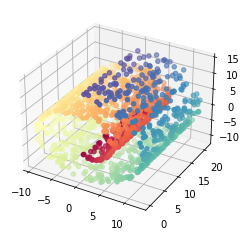

In [33]:
ax = plt.subplot(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c = color, cmap=plt.cm.Spectral)  # 原始数据

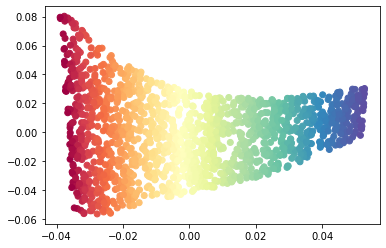

In [34]:
plt.scatter(X_r[:,0],X_r[:,1],c = color, cmap=plt.cm.Spectral)   # 投射数据
plt.show()

经过 LLE 变换后，样本数据在低维空间上已经明显区分出来

# 5、拉普拉斯特征映射

拉普拉斯特征映射 LE 解决问题的思路和 LLE 相似，是一种基于图的降维算法，使相互关联的点在降维后的空间中尽可能地靠近

通过构建邻接矩阵为 W 的图来重构数据流形的局部结构特征，如果两个数据实例 i 和 j 很相似，那么 i 和 j 在降维后目标子空间中也应该接近。设数据实例的数目为 n ,目标子空间（即降维后的维度）为 m ，定义 n * m 大小的矩阵 Y ，其中每一个行向量 y_i 是数据实例 i 在目标子空间中的向量表示。为了让样本 i 和 j 在降维后的子空间里尽量接近，优化的目标函数为：
$$min\sum||y_{i}-y_{j}||^{2}w_{ij}$$ ,也就是 i 和 j 距离平方求和乘以权重的最小值！

权重值可以是图中样本间的连接数来度量。

化简: $$ L_{y} = \lambda D_{y}$$

其中 L 和 D 均为对称矩阵，由于目标函数是求最小值，所以通过求得 m 个最小非零特征值所对应的特征向量，即可达到降维的目的。

拉普拉斯特征映射基本步骤：

(1) 构建无向图，将所有的样本以点连接成一个图，例如使用 KNN 算法，将每个点最近的 k 个点进行连接，其中 k 是自己设定的值；

(2) 构建图的权值矩阵，通过点之间的关联程度来确定点与点之间的权重大小，例如，两个点之间如果相连接，则权重为1，否则为0；

(3) 特征映射，通过公式 $ L_{y} = \lambda D_{y}$ 计算拉普拉斯矩阵 L 的特征向量和特征值，用最小的 m 个非零特征值对应的特征向量作为降维的结果。

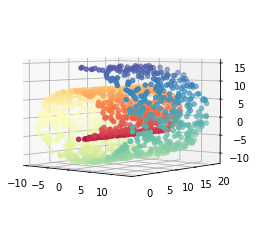

In [1]:
# 例子：
from sklearn import manifold, datasets
import numpy as np
import matplotlib.pyplot as plt

X,color = datasets.make_swiss_roll(n_samples = 1500)

ax = plt.subplot(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c = color, cmap=plt.cm.Spectral)  # 原始数据
ax.view_init(4,-50)  # 调整三维视角

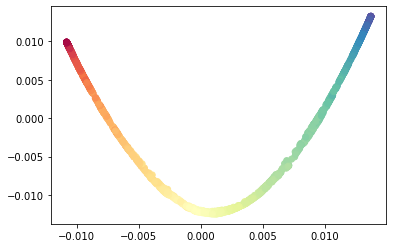

In [2]:
se = manifold.SpectralEmbedding(n_components=2,n_neighbors=10)  # 2维10个近邻点
Y = se.fit_transform(X)  # 将原始样本投射到新的子空间中

# LE 降维后可视化
plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
plt.show()

对比原始样本在三维空间和降维之后在二维空间的分布情况，可以看到，在高维和低维空间中的样本分布形状发生了变化，但降维后样本之间的联系并没有改变！！！